<h1 align=center> Tarea 8: Reducción de Dimensionalidad
 </h1>

Integrantes:
- Axel Mondaca
- Sebastián Hernández

In [1]:
%pip install umap-learn
%pip install -U spacy

import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import umap.umap_ as umap

from sklearn.impute import SimpleImputer

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 964.0 kB/s eta 0:00:03
   ----------- ---------------------------- 0.8/2.7 MB 1.0 MB/s eta 0:00:02
   --------------- ------------------------ 1.0/2.7 MB 938.3 kB/s eta 0:00:02
   --------------- ------------------------ 1.0/2.7 MB 938.3 kB/s eta 0:00:02
   ------------------- -------------------- 1.3/2.7 MB 946.2 kB/s eta 0:00:02
   ---------------------- ----------------- 1.6/2.7 MB 875.2 kB/s eta 0:00:02
   ---------------------- ----------------- 1.6/2.7 MB 875.2 kB/s eta 0:00:02
   -------------------------- ------------- 1.8/2.7 MB 888.9 kB/s eta 0:00:02
   ------------------------------ --------- 2.1/2.7 MB 916.6 kB/s eta 0:00:01
   ---------------------------------- ----- 2.4/2.7 MB 944.3 kB/s eta 0:00:01
   ------------

c:\Users\axel0\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('customers_Tarea8.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
X = df.drop(axis=1, columns=["Response"])
y = df['Response']


In [4]:
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X.select_dtypes(include=['object', 'category']).columns.tolist()

preproc = ColumnTransformer(
    [("num", Pipeline([("imputer", SimpleImputer(strategy='mean')), ("scaler", StandardScaler())]), numerical),
     ("cat", Pipeline([("imputer", SimpleImputer(strategy='most_frequent')), ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))]), categorical)]
)
X_processed = preproc.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=254, stratify=y)

### PCA, Principal Component Analysis

In [6]:
#Sin reduccion
rf_pipe = Pipeline([
    ("preproc", preproc),
    ("clasificador",RandomForestClassifier(random_state=254))])

rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       381
           1       0.63      0.36      0.46        67

    accuracy                           0.87       448
   macro avg       0.76      0.66      0.69       448
weighted avg       0.86      0.87      0.86       448



In [7]:
#Con reduccion de dimensionalidad
rf_pipe_pca = Pipeline([
    
    ("preproc", preproc),
    ("red_dim", PCA(n_components=5, random_state=254)),
    ("clasificador",RandomForestClassifier(random_state=254))])

rf_pipe_pca.fit(X_train, y_train)
y_pred_pca = rf_pipe_pca.predict(X_test)
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       381
           1       0.41      0.34      0.37        67

    accuracy                           0.83       448
   macro avg       0.65      0.63      0.64       448
weighted avg       0.82      0.83      0.82       448



In [8]:
pca = rf_pipe_pca.named_steps['red_dim']
cant_componentes = pca.n_components_
print(f"Cantidad de componentes: {cant_componentes} y varianza explicada: {np.cumsum(pca.explained_variance_ratio_)[-1]*100:.3f}%")

Cantidad de componentes: 5 y varianza explicada: 99.958%


In [9]:
def plot_reduction(X_reduced, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter, label='Response')
    plt.title(title)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.show()

In [17]:
pca_2 = PCA(n_components=2, random_state=254)
X_pca_2 = pca_2.fit_transform(X_processed)
plot_reduction(pca, y, "PCA Reduction")

TypeError: 'PCA' object is not subscriptable

<Figure size 800x600 with 0 Axes>

### t-SNE

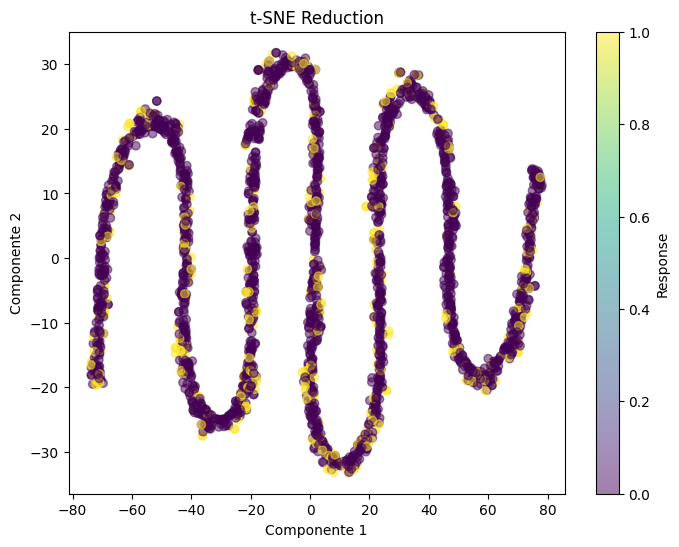

In [11]:
tsne = TSNE(n_components=2, random_state=254)
X_tsne =tsne.fit_transform(X_processed)
plot_reduction(X_tsne, y, "t-SNE Reduction")

### UMAP

c:\Users\axel0\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


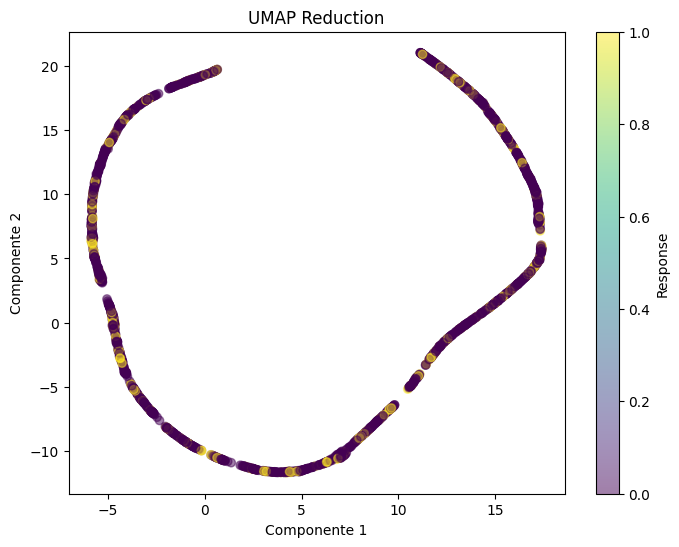

In [13]:
umap_model = umap.UMAP(n_components=2, random_state=254)
X_umap = umap_model.fit_transform(X_processed)
plot_reduction(X_umap, y, "UMAP Reduction")